In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

import copy
import os.path as osp

import mmcv
import numpy as np
from mmcv.utils import build_from_cfg
from PIL import Image

from mmseg.datasets.builder import PIPELINES

%matplotlib inline

PATH_TO_IMAGE = "/home/n_stolyarov/HDD/Datasets/SberMerged/test/images/1.png"
PATH_TO_SEG = "/home/n_stolyarov/HDD/Datasets/SberMerged/test/Semantic/1.png"



In [119]:
img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='DistortPinholeToFisheye', transform_probability = 1,  input_shape = (720,1280), output_shape = (1200,1920),
                                        focal_distances = [25, 50, 75, 100, 125, 150], maps_probability = None),
    dict(type='RandomFisheyeShift', prob=0.5, max_dx=300, max_dy=300),
    dict(type='RandomFisheyeCrop', prob=0.5,
         part_x_range=(0.8, 1.4), part_y_range=(0.8, 1.4)),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PhotoMetricDistortion'),
    dict(type='Normalize', **img_norm_cfg),
    dict(type='Resize', img_scale=(512, 512), keep_ratio=True, ratio_range=(1, 1.5))
]

In [126]:
results = dict()
results['img_info'] = {
    'filename': PATH_TO_IMAGE
}
results['ann_info'] = {
    'seg_map': PATH_TO_SEG
}
results['seg_fields'] = []

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


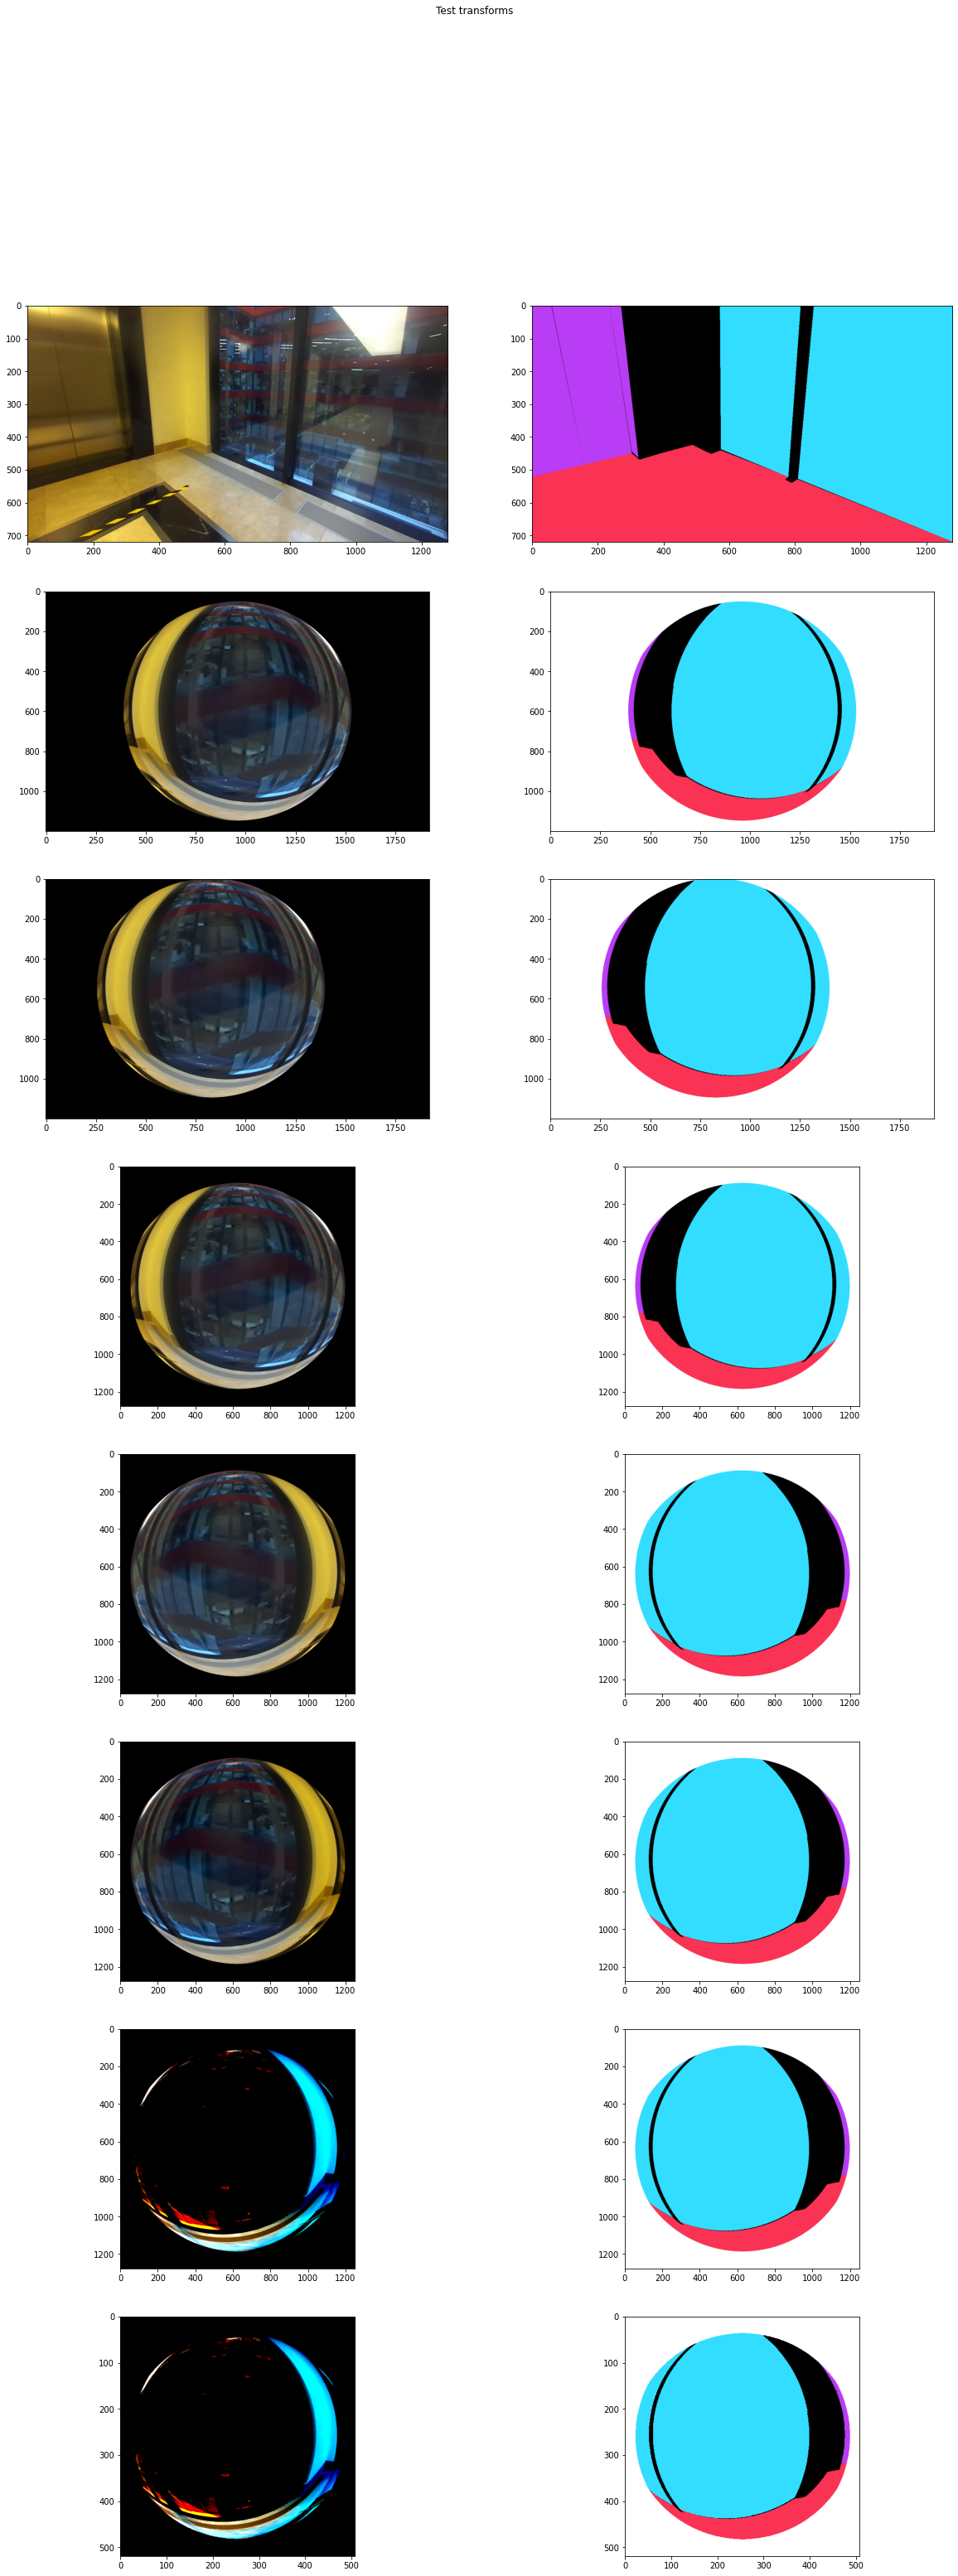

In [127]:
orig_img_transforms = []
seg_img_transforms = []
for transform_dict in train_pipeline:
    transform = build_from_cfg(transform_dict, PIPELINES)
    results = transform(results)
    if 'img' in results and 'gt_semantic_seg' in results:
        orig_img_transforms.append(copy.deepcopy(results['img']))
        seg_img_transforms.append(copy.deepcopy(results['gt_semantic_seg']))
num_img = len(orig_img_transforms)
fig, axes = plt.subplots(num_img, 2)
fig.suptitle('Test transforms')
fig.set_size_inches(20, 50)
for i, (orig, seg) in enumerate(zip(orig_img_transforms, seg_img_transforms)):
    axes[i, 0].imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
    axes[i, 1].imshow(cv2.cvtColor(seg, cv2.COLOR_BGR2RGB))
plt.show()